<a href="https://colab.research.google.com/github/Annrosejojue/ai-chatbot-performance-intelligence/blob/main/AI_Chatbot_Performance_Intelligence_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas numpy seaborn matplotlib plotly

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


# Upload file manually in Colab
from google.colab import files
uploaded = files.upload()

# Assuming file name is BI_Chatbot_Interactions.csv
df = pd.read_csv(list(uploaded.keys())[0])

print("Dataset Loaded Successfully!")
df.head()


Saving BI_Chatbot_Interactions.csv to BI_Chatbot_Interactions.csv
Dataset Loaded Successfully!


,interaction_id,timestamp,department,user_role,user_query,query_category,metrics_requested,analysis_type,bot_response_confidence,response_time_ms,user_feedback_rating,estimated_business_impact
0,INT-100000,2025-08-12 08:29:31.851880,HR,Intern,Forecast next quarter revenue,Revenue,Revenue,Descriptive,0.73,2381,4.0,High
1,INT-100001,2025-10-08 15:20:31.851905,Operations,Analyst,Forecast next quarter revenue,Marketing,Profit Margin,Descriptive,0.89,635,2.0,Low
2,INT-100002,2025-09-21 01:42:31.851909,Finance,Manager,What is customer churn rate?,Marketing,Conversion Rate,Predictive,0.84,557,5.0,NaN
3,INT-100003,2025-09-07 01:43:31.851912,Operations,Analyst,Compare sales performance by region,Marketing,Conversion Rate,Trend Analysis,0.76,2499,4.0,NaN
4,INT-100004,2025-09-17 20:17:31.851914,Operations,Executive,Which campaign had highest ROI?,Marketing,Conversion Rate,Predictive,0.98,334,2.0,High


In [2]:
# Shape of dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Column names
df.columns


Rows: 3200
Columns: 12


Index(['interaction_id', 'timestamp', 'department', 'user_role', 'user_query',
       'query_category', 'metrics_requested', 'analysis_type',
       'bot_response_confidence', 'response_time_ms', 'user_feedback_rating',
       'estimated_business_impact'],
      dtype='object')

In [3]:
# Missing values
df.isna().sum()

# Data types
df.dtypes


,0
interaction_id,object
timestamp,object
department,object
user_role,object
user_query,object
query_category,object
metrics_requested,object
analysis_type,object
bot_response_confidence,float64
response_time_ms,int64


In [8]:
def convert_timestamp(x):
    try:
        minutes, seconds = x.split(":")
        return int(minutes) * 60 + float(seconds)
    except:
        return np.nan

df['timestamp_seconds'] = df['timestamp'].apply(convert_timestamp)



In [9]:
df['estimated_business_impact'] = df['estimated_business_impact'].replace("nan", np.nan)


/tmp/ipython-input-3552335150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='department', palette='viridis')


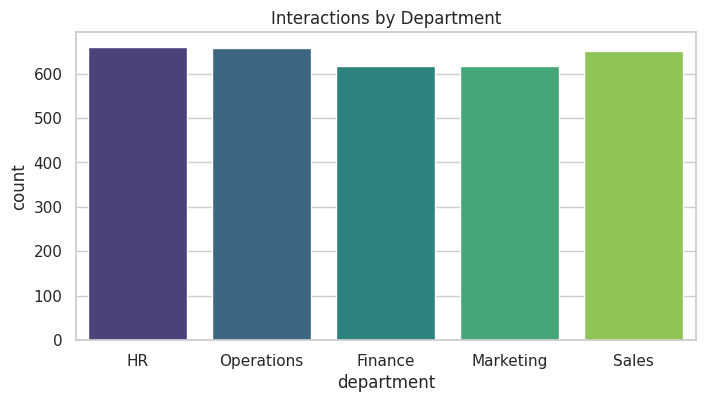

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='department', palette='viridis')
plt.title("Interactions by Department")
plt.show()


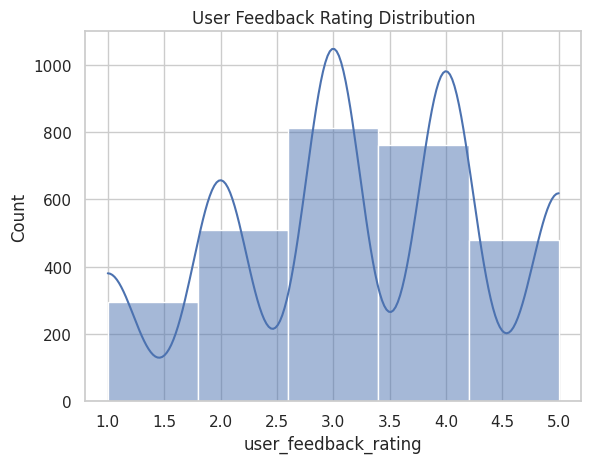

In [10]:
sns.histplot(df['user_feedback_rating'], bins=5, kde=True)
plt.title("User Feedback Rating Distribution")
plt.show()



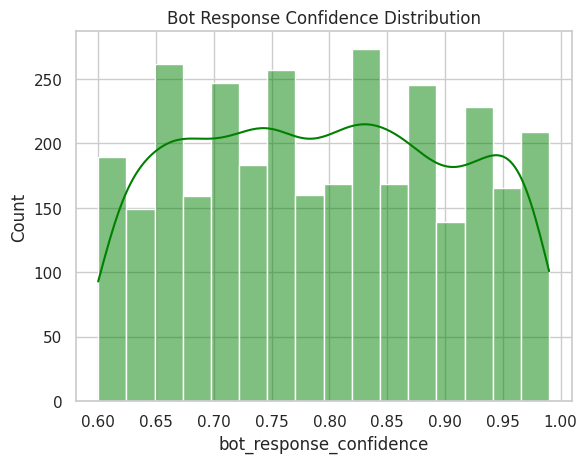

In [11]:
sns.histplot(df['bot_response_confidence'], kde=True, color='green')
plt.title("Bot Response Confidence Distribution")
plt.show()


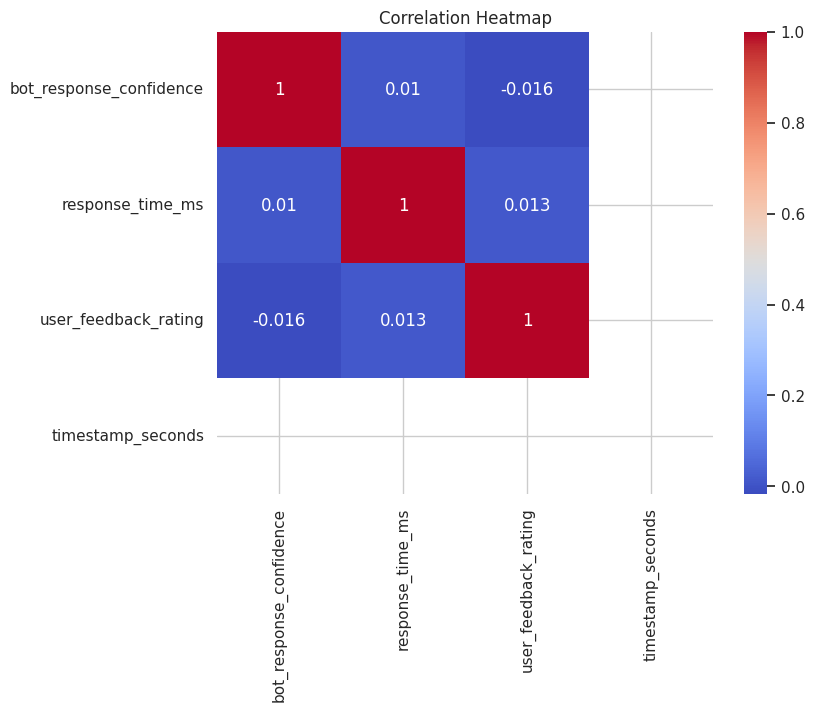

In [12]:
numeric_df = df[['bot_response_confidence',
                 'response_time_ms',
                 'user_feedback_rating',
                 'timestamp_seconds']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [13]:
df.to_csv("cleaned_chatbot_data.csv", index=False)
print("Cleaned dataset saved for Day 2!")


Cleaned dataset saved for Day 2!
